In [1]:
%matplotlib inline

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

pd.set_option('precision', 4) # number precision for pandas
pd.set_option('display.max_rows', 12)
pd.set_option('display.max_columns', 12)
pd.set_option('display.float_format', '{:20,.4f}'.format) # get rid of scientific notation


/home/kranthidr/.virtualenvs/tml-lab/lib64/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [2]:
nci60 = pd.read_csv('~/data/isl_data/islr-datasets/NCI60.csv', index_col=0)

In [3]:
nci_labs = nci60.labs
nci_data = nci60.drop('labs', axis=1)

In [4]:
nci_data.head()

,data.1,data.2,data.3,data.4,data.5,data.6,...,data.6825,data.6826,data.6827,data.6828,data.6829,data.6830
V1,0.3000,1.1800,0.5500,1.1400,-0.2650,-0.0700,...,0.6300,-0.0300,0.0000,0.2800,-0.3400,-1.9300
V2,0.6800,1.2900,0.1700,0.3800,0.4650,0.5800,...,0.1099,-0.8600,-1.2500,-0.7700,-0.3900,-2.0000
V3,0.9400,-0.0400,-0.1700,-0.0400,-0.6050,0.0000,...,-0.2700,-0.1500,0.0000,-0.1200,-0.4100,0.0000
V4,0.2800,-0.3100,0.6800,-0.8100,0.6250,-0.0000,...,-0.3500,-0.3000,-1.1500,1.0900,-0.2600,-1.1000
V5,0.4850,-0.4650,0.3950,0.9050,0.2000,-0.0050,...,0.6350,0.6050,0.0000,0.7450,0.4250,0.1450


In [5]:
nci_labs.head()

V1       CNS
V2       CNS
V3       CNS
V4     RENAL
V5    BREAST
Name: labs, dtype: object

In [6]:
nci_labs.value_counts()

RENAL          9
NSCLC          9
MELANOMA       8
COLON          7
BREAST         7
OVARIAN        6
              ..
PROSTATE       2
K562B-repro    1
MCF7A-repro    1
MCF7D-repro    1
K562A-repro    1
UNKNOWN        1
Name: labs, Length: 14, dtype: int64

# 10.6.1 PCA on the NCI60 Data

In [7]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
nci_scaled = scaler.fit_transform(nci_data)

pca = PCA()
pca.fit(nci_scaled)

/home/kranthidr/.virtualenvs/tml-lab/lib64/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/kranthidr/.virtualenvs/tml-lab/lib64/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/kranthidr/.virtualenvs/tml-lab/lib64/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/kranthidr/.virtualenvs/tml-lab/lib64/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [8]:
x = pca.transform(nci_scaled)

In [9]:
nci_scaled.shape

(64, 6830)

In [10]:
x.shape

(64, 64)

In [11]:
x[0:2,0:2]

array([[-19.83804169,  -3.55563601],
       [-23.08921491,  -6.44145978]])

In [12]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
color_index = le.fit_transform(nci_labs)

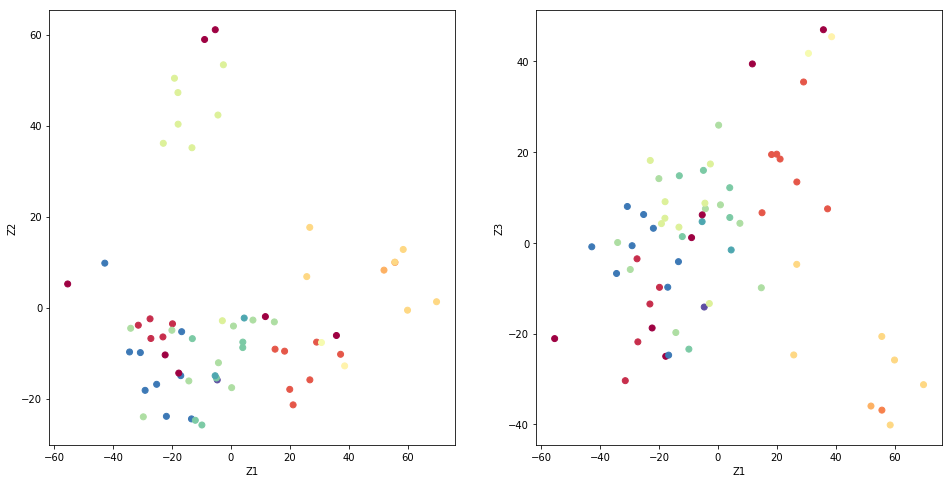

In [13]:
f, axes = plt.subplots(1, 2, sharex=False, sharey=False)

f.set_figheight(8)
f.set_figwidth(16)

axes[0].scatter(x[:, 0], x[:, 1], c=color_index, cmap='Spectral')
axes[0].set_xlabel('Z1')
axes[0].set_ylabel('Z2')

axes[1].scatter(x[:, 0], x[:, 2], c=color_index, cmap='Spectral')
axes[1].set_xlabel('Z1')
axes[1].set_ylabel('Z3');

In [14]:
pca.explained_variance_ratio_[:5]

array([0.11358942, 0.06756203, 0.05751842, 0.04247554, 0.03734972])

In [15]:
pca.explained_variance_ratio_.cumsum()[:5]

array([0.11358942, 0.18115144, 0.23866987, 0.28114541, 0.31849513])

/home/kranthidr/.virtualenvs/tml-lab/lib64/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


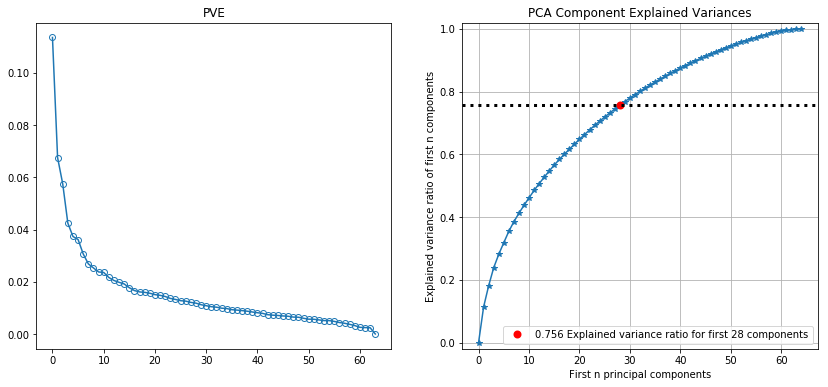

In [16]:
from scikitplot.decomposition import plot_pca_component_variance

f, axes = plt.subplots(1, 2, sharex=False, sharey=False)

f.set_figheight(6)
f.set_figwidth(14)

axes[0].plot(pca.explained_variance_ratio_, marker='o', markeredgewidth=1, markerfacecolor='None')
axes[0].set_title('PVE')
plot_pca_component_variance(pca, ax=axes[1]);

# 10.6.2 Clustering the Observations of the NCI60 Data

/home/kranthidr/.virtualenvs/tml-lab/lib64/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


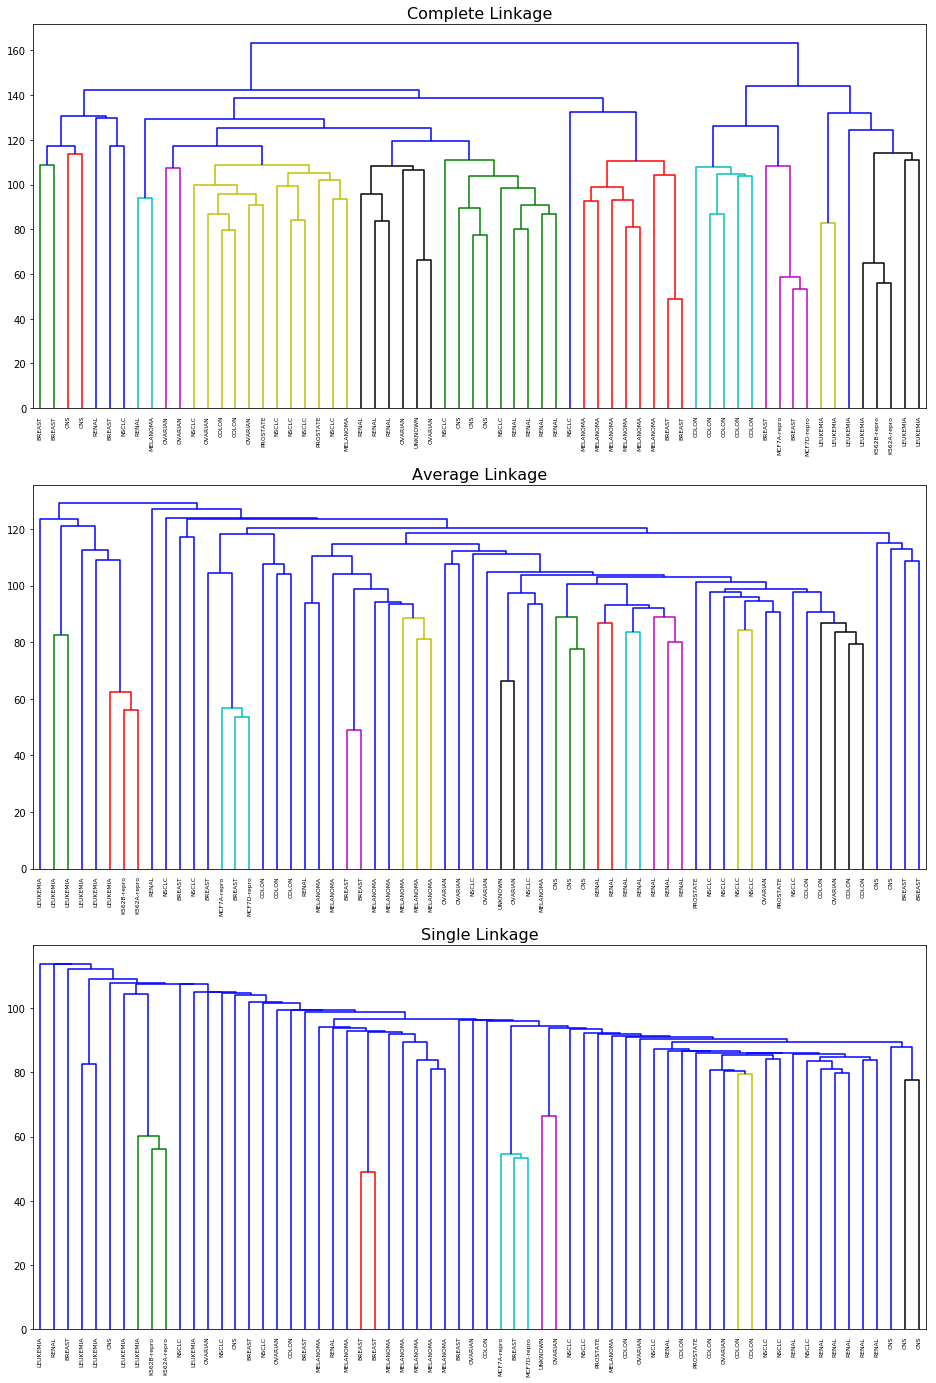

In [17]:
from scipy.cluster.hierarchy import dendrogram, linkage, cut_tree

f, axes = plt.subplots(3, 1, sharex=False, sharey=False)

f.set_figheight(24)
f.set_figwidth(16)

dendrogram(linkage(nci_scaled, method='complete'),
           labels=nci_labs,
           leaf_rotation=90,
           leaf_font_size=6,
           ax=axes[0])

dendrogram(linkage(nci_scaled, method='average'),
           labels=nci_labs,
           leaf_rotation=90,
           leaf_font_size=6,
           ax=axes[1])

dendrogram(linkage(nci_scaled, method='single'),
           labels=nci_labs,
           leaf_rotation=90,
           leaf_font_size=6,
           ax=axes[2])

axes[0].set_title('Complete Linkage', size=16)
axes[1].set_title('Average Linkage', size=16)
axes[2].set_title('Single Linkage', size=16);

In [18]:
hc_clusters = cut_tree(linkage(nci_scaled, method='complete'), 4).ravel()

pd.crosstab(hc_clusters, nci_labs)

labs,BREAST,CNS,COLON,K562A-repro,K562B-repro,LEUKEMIA,...,MELANOMA,NSCLC,OVARIAN,PROSTATE,RENAL,UNKNOWN
row_0,,,,,,,,,,,,,
0,2,3,2,0,0,0,...,8,8,6,2,8,1
1,3,2,0,0,0,0,...,0,1,0,0,1,0
2,0,0,0,1,1,6,...,0,0,0,0,0,0
3,2,0,5,0,0,0,...,0,0,0,0,0,0


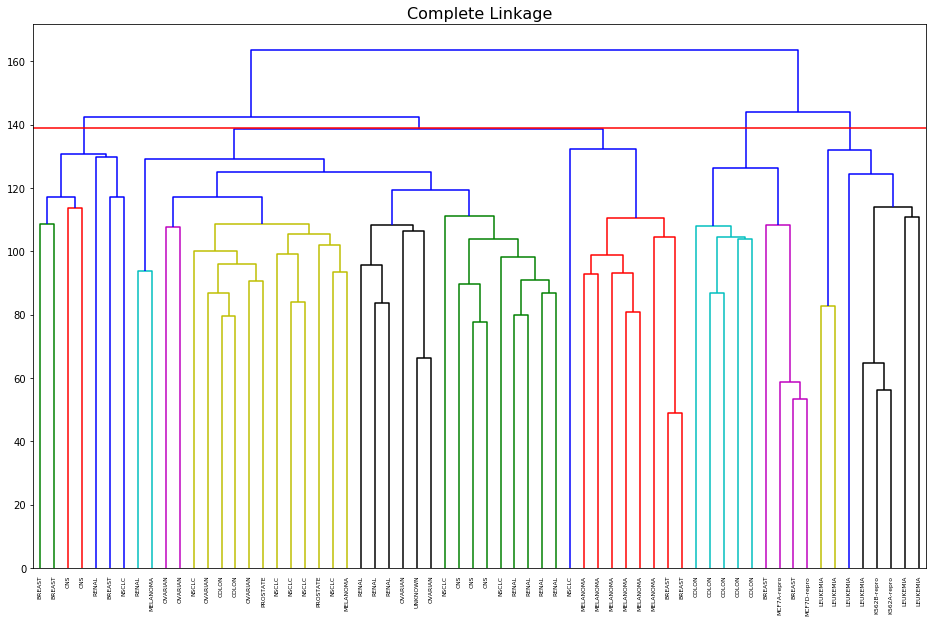

In [19]:
plt.figure(figsize=(16, 10))

dendrogram(linkage(nci_scaled, method='complete'),
           labels=nci_labs,
           leaf_rotation=90,
           leaf_font_size=6)

plt.axhline(y=139, c='r')
plt.title('Complete Linkage', size=16);

In [20]:
from sklearn.cluster import KMeans

km = KMeans(n_clusters=4, n_init=20, random_state=42)
km.fit(nci_scaled)

pd.crosstab(km.labels_, hc_clusters)

/home/kranthidr/.virtualenvs/tml-lab/lib64/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


col_0,0,1,2,3
row_0,,,,
0,9,0,0,0
1,9,0,0,8
2,22,7,0,0
3,0,0,8,1


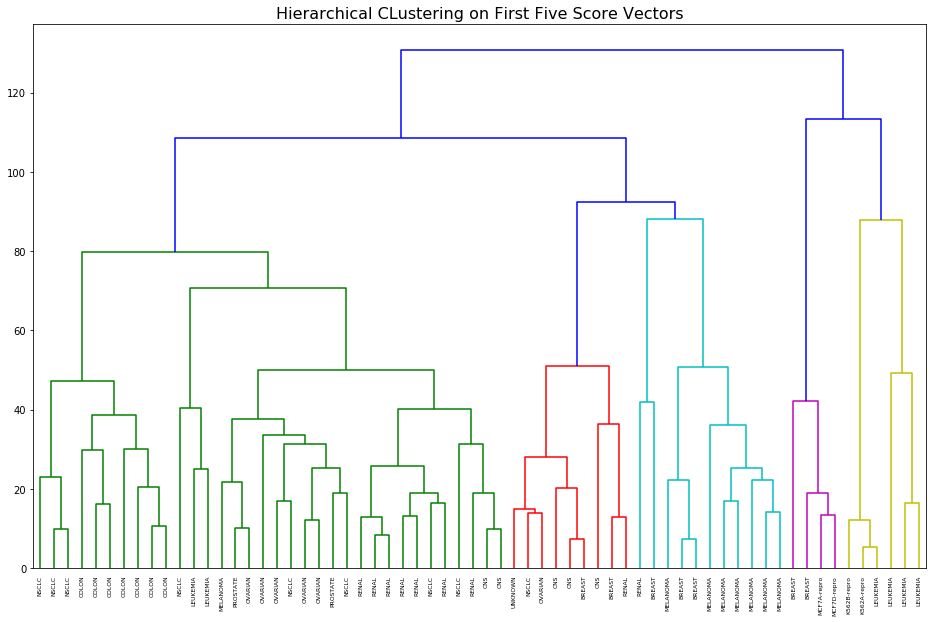

In [21]:
hc2 = linkage(x[:, 0:5], method='complete')

plt.figure(figsize=(16, 10))

dendrogram(hc2,
           labels=nci_labs,
           leaf_rotation=90,
           leaf_font_size=6)

plt.title('Hierarchical CLustering on First Five Score Vectors', size=16);

In [22]:
pd.crosstab(cut_tree(hc2, 4).ravel(), nci_labs)

labs,BREAST,CNS,COLON,K562A-repro,K562B-repro,LEUKEMIA,...,MELANOMA,NSCLC,OVARIAN,PROSTATE,RENAL,UNKNOWN
row_0,,,,,,,,,,,,,
0,0,2,7,0,0,2,...,1,8,5,2,7,0
1,5,3,0,0,0,0,...,7,1,1,0,2,1
2,0,0,0,1,1,4,...,0,0,0,0,0,0
3,2,0,0,0,0,0,...,0,0,0,0,0,0
